# Robótica 2
# Trabajo de Robots Móviles

Grupo 2

Navegación basado en el algoritmo de
campo de potencial

**Integrantes:**

*José Bergottini*

*Iván González*

**Prof:** *Fernando Brunetti*

**Año:** 2023

*Facultad de Ingeniería de la Universidad Nacional de Asunción*

# **Fórmulas utilizadas**
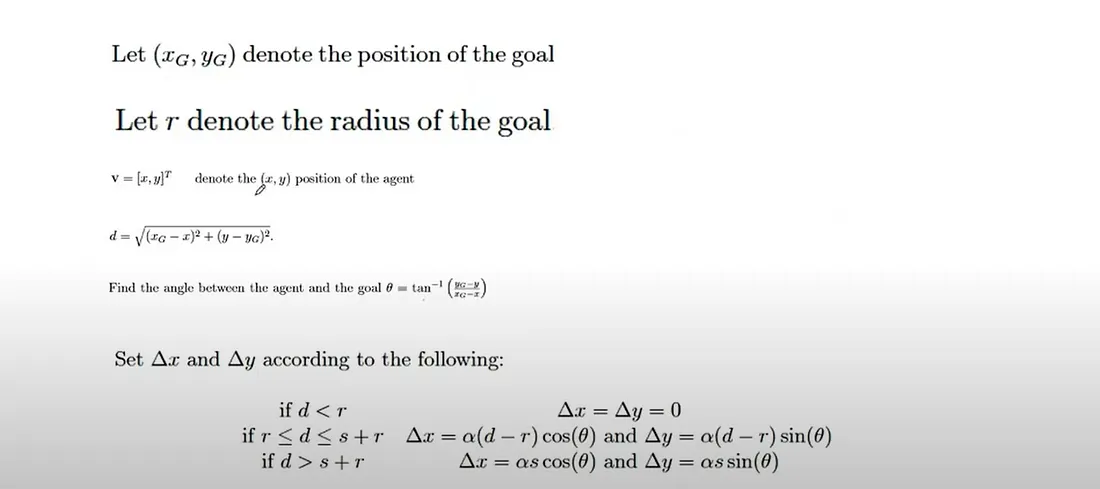
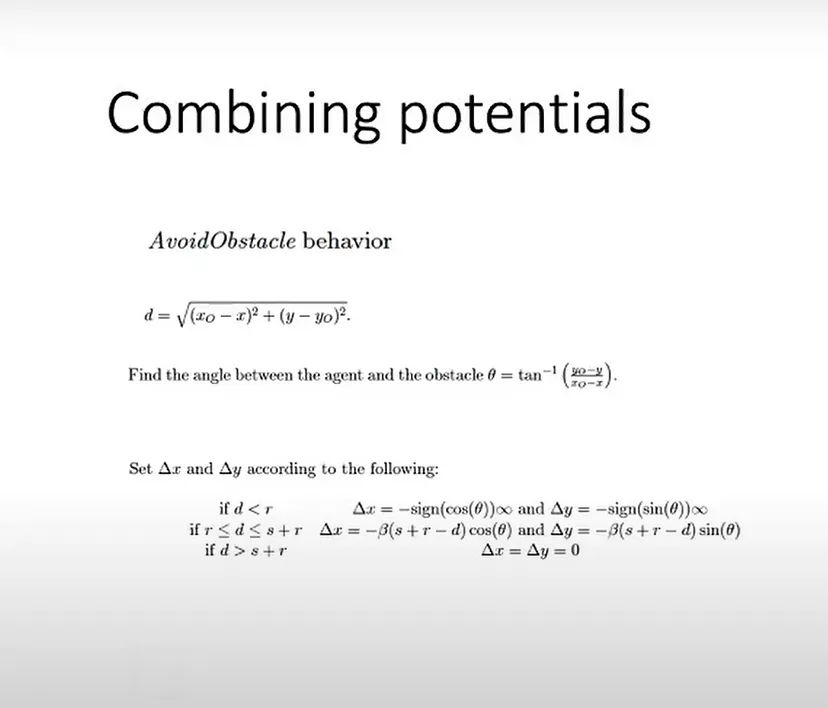




# **Referencias**
ASLAN. (2021). Planificación de rutas locales mediante un campo de potencial virtual en Python.
[https://medium.com/nerd-for-tech/local-path-planning-using-virtual-potential-field-in-python-ec0998f490af](https://)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

In [ ]:
def add_obstacle(X, Y, delx, dely, obstacle, i, j):
    s = 2
    r=0.5
    b=20
    # Distancia al obstáculo
    d_obstacle = np.sqrt((obstacle[0]-X[i][j])**2 + (obstacle[1]-Y[i][j])**2)

    # Theta del obstáculo
    theta_obstacle = np.arctan2(obstacle[1] - Y[i][j], obstacle[0]  - X[i][j])

    if d_obstacle < r:
        delx[i][j] += -np.sign(np.cos(theta_obstacle))
        dely[i][j] += -np.sign(np.cos(theta_obstacle))
    elif d_obstacle>r+s:
        delx[i][j] += 0
        dely[i][j] += 0
    else:
        delx[i][j] += -b *(s+r-d_obstacle)* np.cos(theta_obstacle)
        dely[i][j] += -b * (s+r-d_obstacle)*  np.sin(theta_obstacle)

    return delx, dely

In [ ]:
def calcular_certeza(obstaculo,frente):
    # obstaculo: tupla representando la posición del obstáculo
    # frente: tupla representando la posición del frente

    o_x=obstaculo[0]
    o_y=obstaculo[1]
    f_x=frente[0]
    f_y=frente[1]

    d= np.sqrt((o_x-f_x)**2+(o_y-f_y)**2)

    if d==1:
        c=0.35
    elif 1<d<2.7:
        c=0.2
    elif 2.7 <= d:
        c=0.1

    return d,c

In [ ]:
def mostrar_mapa(map_array,delx,dely,punto_aux):
    p_x=punto_aux[0]
    p_y=punto_aux[1]

    # Crear una figura y ejes
    fig, ax = plt.subplots()
    cmap = ListedColormap(['yellow', 'black','red','green','blue'])
    # Mostrar el tablero
    ax.imshow(map_array, cmap=cmap, origin="upper",interpolation='none')

    # Configurar el aspecto de la gráfica
    ax.set_xticks(np.arange(-0.5, 9, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 9, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)

    # Configurar las etiquetas de los ejes
    ax.set_xticks([])
    ax.set_yticks([])

    delta_x= delx[p_y][p_x]
    delta_y= dely[p_y][p_x]

    # Flecha
    ax.quiver(p_x, p_y, p_x+delta_x, p_y+delta_y, angles='xy', scale_units='xy', scale=10, color='blue')

    # Mostrar la gráfica
    plt.show()

In [ ]:
def hallar_velocidad(punto_aux,delx,dely):
    p_x=punto_aux[0]
    p_y=punto_aux[1]
    vel=np.sqrt(delx[p_y][p_x]**2 + dely[p_y][p_x]**2)

    return vel

In [ ]:
def buscar_obstaculos(map_array, frente, orientacion):
    f_x=frente[0]
    f_y=frente[1]
    obs=[]

    if orientacion=="abajo":
        if 0 <= f_x+2 <=9:
            limite_der = 2
        elif 0 <= f_x+1 <=9:
            limite_der = 1
        else:
            limite_der = 0

        if 0 <= f_x-2 <=9:
            limite_izq = -2
        elif 0 <= f_x-1 <=9:
            limite_izq = -1
        else:
            limite_izq = 0

        if 0 <= f_y+2 <=9:
            limite_aba = 2
        elif 0 <= f_y+1 <=9:
            limite_aba = 1
        else:
            limite_aba = 0

        for i in range(0,limite_aba+1):
            for j in range(limite_izq, limite_der+1):
                if map_array[f_y+i][f_x+j] == 1:
                    obs.append((f_x+j,f_y+i))

    elif orientacion=="arriba":
        if 0 <= f_x+2 <=9:
            limite_der = 2
        elif 0 <= f_x+1 <=9:
            limite_der = 1
        else:
            limite_der = 0

        if 0 <= f_x-2 <=9:
            limite_izq = -2
        elif 0 <= f_x-1 <=9:
            limite_izq = -1
        else:
            limite_izq = 0

        if 0 <= f_y-2 <=9:
            limite_arr = -2
        elif 0 <= f_y-1 <=9:
            limite_arr = -1
        else:
            limite_arr = 0

        for i in range(limite_arr,1):
            for j in range(limite_izq, limite_der+1):
                if map_array[f_y+i][f_x+j] == 1:
                    obs.append((f_x+j,f_y+i))
    elif orientacion=="derecha":
        if 0 <= f_x+2 <=9:
            limite_der = 2
        elif 0 <= f_x+1 <=9:
            limite_der = 1
        else:
            limite_der = 0

        if 0 <= f_y-2 <=9:
            limite_arr = -2
        elif 0 <= f_y-1 <=9:
            limite_arr = -1
        else:
            limite_arr = 0

        if 0 <= f_y+2 <=9:
            limite_aba = 2
        elif 0 <= f_y+1 <=9:
            limite_aba = 1
        else:
            limite_aba = 0

        for i in range(limite_arr,limite_aba+1):
            for j in range(0, limite_der+1):
                if map_array[f_y+i][f_x+j] == 1:
                    obs.append((f_x+j,f_y+i))
    else:
        if 0 <= f_x-2 <=9:
            limite_izq = -2
        elif 0 <= f_x-1 <=9:
            limite_izq = -1
        else:
            limite_izq = 0

        if 0 <= f_y-2 <=9:
            limite_arr = -2
        elif 0 <= f_y-1 <=9:
            limite_arr = -1
        else:
            limite_arr = 0

        if 0 <= f_y+2 <=9:
            limite_aba = 2
        elif 0 <= f_y+1 <=9:
            limite_aba = 1
        else:
            limite_aba = 0

        for i in range(limite_arr,limite_aba+1):
            for j in range(limite_izq, 1):
                if map_array[f_y+i][f_x+j] == 1:
                    obs.append((f_x+j,f_y+i))

    return obs


In [ ]:
def mover_adelante(frente, cola, punto_sgte, map_array, pos, certezas, band):

    f_x = frente[0]
    f_y = frente[1]
    c_x = cola[0]
    c_y = cola[1]

    info=""
    mov= "adelante"

    if pos=="vertical":
        # Apunta abajo
        if f_y > c_y:
            punto_aux=[f_x,f_y+1]
        # Apunta arriba
        else:
            punto_aux=[f_x,f_y-1]

        if punto_aux[0] < 0 or punto_aux[0] > 9 or punto_aux[1] < 0 or punto_aux[1] > 9:
            limite=1
            info += "\nSe llegó al límite, el robot no puede avanzar más"
            band=1

        # Hay obstáculo
        elif map_array[punto_aux[1]][punto_aux[0]]==1:
            d,c = calcular_certeza((punto_aux[0],punto_aux[1]),(f_x,f_y))
            info += "\nEligiendo nueva dirección"
            # Se realizará un giro en el próximo movimiento si es posible
            if punto_sgte[0] > f_x:
                if map_array[f_y][f_x+1] != 1 and map_array[c_y][c_x+1] != 1:
                    punto_aux=[f_x+1,c_y] # Gira hacia el lado más favorable
                    mov="giro"
                elif 0 <= f_x-1 <= 9:
                    # Hay obstáculo
                    if map_array[f_y][f_x+1] == 1:
                        d,c = calcular_certeza((f_x+1,f_y),(f_x,f_y))
                        info += "\nEligiendo nueva dirección"
                    if map_array[f_y][f_x-1] != 1 and map_array[c_y][c_x-1] != 1:
                        punto_aux=[f_x-1,c_y] # Gira hacia el lado más favorable
                        mov="giro"
                    else:
                        # Hay obstáculo
                        if map_array[f_y][f_x-1] == 1:
                            d,c = calcular_certeza((f_x-1,f_y),(f_x,f_y))
                        info += "\nEl robot tiene restringido todos sus movimientos."
                        band=1
                else:
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
            if punto_sgte[0] < f_x:
                if map_array[f_y][f_x-1] != 1 and map_array[c_y][c_x-1] != 1:
                    punto_aux=[f_x-1,c_y] # Gira hacia el lado más favorable
                    mov="giro"
                elif 0 <= f_x+1 <= 9:
                    # Hay obstáculo
                    if map_array[f_y][f_x-1] == 1:
                        d,c = calcular_certeza((f_x-1,f_y),(f_x,f_y))
                        info += "\nEligiendo nueva dirección"
                    if map_array[f_y][f_x+1] != 1 and map_array[c_y][c_x+1] != 1:
                        punto_aux=[f_x+1,c_y] # Gira hacia el lado más favorable
                        mov="giro"
                    else:
                        # Hay obstáculo
                        if map_array[f_y][f_x+1] == 1:
                            d,c = calcular_certeza((f_x+1,f_y),(f_x,f_y))
                        info += "\nEl robot tiene restringido todos sus movimientos."
                        band=1
                else:
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
    if pos=="horizontal":
        # Apunta a la derecha
        if f_x > c_x:
            punto_aux=[f_x+1,f_y]
        # Apunta a la izquierda
        else:
            punto_aux=[f_x-1,f_y]

        if punto_aux[0] < 0 or punto_aux[0] > 9 or punto_aux[1] < 0 or punto_aux[1] > 9:
            info += "\nSe llegó al límite, el robot no puede avanzar más"
            band=1

        # Hay obstáculo
        elif map_array[punto_aux[1]][punto_aux[0]]==1:
            d,c = calcular_certeza((punto_aux[0],punto_aux[1]),(f_x,f_y))
            info += "\nEligiendo nueva dirección"
            # Se realizará un giro en el próximo movimiento si es posible
            if punto_sgte[1] > f_y:
                if map_array[f_y+1][f_x] != 1 and map_array[c_y+1][c_x] != 1:
                    punto_aux=[c_x,f_y+1] # Gira hacia el lado más favorable
                    mov="giro"
                elif 0 <= f_y-1 <= 9:
                    # Hay obstáculo
                    if map_array[f_y+1][f_x] == 1:
                        d,c = calcular_certeza((f_x,f_y+1),(f_x,f_y))
                        info += "\nEligiendo nueva dirección"
                    if map_array[f_y-1][f_x] != 1 and map_array[c_y-1][c_x] != 1:
                        punto_aux=[c_x,f_y-1] # Gira hacia el lado más favorable
                        mov="giro"
                    else:
                        # Hay obstáculo
                        if map_array[f_y-1][f_x] == 1:
                            d,c = calcular_certeza((f_x,f_y-1),(f_x,f_y))
                        info += "\nEl robot tiene restringido todos sus movimientos."
                        band=1
                else:
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
            if punto_sgte[1] < f_y:
                if map_array[f_y-1][f_x] != 1 and map_array[c_y-1][c_x] != 1:
                    punto_aux=[c_x,f_y-1] # Gira hacia el lado más favorable
                    mov="giro"
                elif 0 <= f_y+1 <= 9:
                    # Hay obstáculo
                    if map_array[f_y-1][f_x] == 1:
                        d,c = calcular_certeza((f_x,f_y-1),(f_x,f_y))
                        info += "\nEligiendo nueva dirección"
                    if map_array[f_y+1][f_x] != 1 and map_array[c_y+1][c_x] != 1:
                        punto_aux=[c_x,f_y+1] # Gira hacia el lado más favorable
                        mov="giro"
                    else:
                        # Hay obstáculo
                        if map_array[f_y+1][f_x] == 1:
                            d,c = calcular_certeza((f_x,f_y+1),(f_x,f_y))
                        info += "\nEl robot tiene restringido todos sus movimientos."
                        band=1
                        #break
                else:
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
                    #break
    return punto_aux, band, info, mov

In [ ]:
def girar(frente, cola, punto_sgte, map_array, pos, certezas, band):

    f_x = frente[0]
    f_y = frente[1]
    c_x = cola[0]
    c_y = cola[1]

    info=""
    mov= "giro"
    segunda_opcion=0

    if pos=="vertical":
        adelante_habilitado=0
        giro2_habilitado=0

        # Apunta abajo
        if f_y > c_y:
            orientacion="abajo"
            if 0 <= f_y+1 <= 9:
                adelante_habilitado=1
        # Apunta arriba
        else:
            orientacion="arriba"
            if 0 <= f_y-1 <= 9:
                adelante_habilitado=1

        if punto_sgte[0] > c_x and punto_sgte[1] == c_y:
            # Gira hacia un lado
            punto_aux=[c_x+1,c_y]
            if 0 <= f_x-1 <= 9:
                giro2_habilitado=1
        else:
            # Gira hacia el otro lado
            punto_aux=[c_x-1,c_y]
            if 0 <= f_x+1 <= 9:
                giro2_habilitado=1

        if punto_aux[0] < 0 or punto_aux[0] > 9 or punto_aux[1] < 0 or punto_aux[1] > 9:
            info += "\nSe llegó al límite, el robot no puede avanzar más "
            band=1
            #break

        # Hay obstáculo
        elif map_array[punto_aux[1]][punto_aux[0]]==1 and giro2_habilitado and adelante_habilitado:
            # Se realizará un giro en el próximo movimiento si es posible
            if punto_aux[0] > c_x:
                if map_array[f_y][f_x-1] != 1 and map_array[c_y][c_x-1] != 1:
                        punto_aux=[f_x-1,c_y] # Gira hacia el otro lado
                        mov="giro"
                        segunda_opcion=1
                elif map_array[f_y][f_x-1] == 1:
                    d,c = calcular_certeza((f_x-1,f_y),(f_x,f_y),certezas) # CAMBIO
                    info += "\nEligiendo nueva dirección"
            if punto_aux[0] < c_x:
                if map_array[f_y][f_x+1] != 1 and map_array[c_y][c_x+1] != 1:
                        punto_aux=[f_x+1,c_y] # Gira hacia el otro lado
                        mov="giro"
                        segunda_opcion=1
                elif map_array[f_y][f_x+1] == 1:
                    d,c = calcular_certeza((f_x+1,f_y),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEligiendo nueva dirección"
            if segunda_opcion != 1:
                if orientacion=="abajo":
                    if map_array[f_y+1][f_x] != 1:
                        punto_aux=[f_x,f_y+1]
                        mov="adelante"
                    else:
                        d,c = calcular_certeza((f_x,f_y+1),(f_x,f_y),certezas)
                        #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                        info += "\nEl robot tiene restringido todos sus movimientos."
                        band=1
                else:
                    if map_array[f_y-1][f_x] != 1:
                        punto_aux=[f_x,f_y-1]
                        mov="adelante"
                    else:
                        d,c = calcular_certeza((f_x,f_y-1),(f_x,f_y),certezas)
                        #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                        info += "\nEl robot tiene restringido todos sus movimientos."
                        band=1

        elif map_array[punto_aux[1]][punto_aux[0]]==1 and giro2_habilitado and adelante_habilitado != 1:
            # Se realizará un giro en el próximo movimiento si es posible
            if punto_aux[0] > c_x:
                if map_array[f_y][f_x-1] != 1 and map_array[c_y][c_x-1] != 1:
                    punto_aux=[f_x-1,c_y] # Gira hacia el otro lado
                    mov="giro"
                elif map_array[f_y][f_x-1] == 1:
                    d,c = calcular_certeza((f_x+1,f_y),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
            if punto_aux[0] < c_x:
                if map_array[f_y][f_x+1] != 1 and map_array[c_y][c_x+1] != 1:
                    punto_aux=[f_x+1,c_y] # Gira hacia el otro lado
                    mov="giro"
                elif map_array[f_y][f_x+1] == 1:
                    d,c = calcular_certeza((f_x+1,f_y),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
        elif map_array[punto_aux[1]][punto_aux[0]]==1 and giro2_habilitado != 1 and adelante_habilitado:
            if orientacion=="abajo":
                if map_array[f_y+1][f_x] != 1:
                    punto_aux=[f_x,f_y+1]
                    mov="adelante"
                else:
                    d,c = calcular_certeza((f_x,f_y+1),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
            else:
                if map_array[f_y-1][f_x] != 1:
                    punto_aux=[f_x,f_y-1]
                    mov="adelante"
                else:
                    d,c = calcular_certeza((f_x,f_y-1),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
        elif map_array[punto_aux[1]][punto_aux[0]]==1:
            info += "\nEl robot tiene restringido todos sus movimientos."
            band=1

    if pos=="horizontal":
        adelante_habilitado=0
        giro2_habilitado=0

        # Apunta a la derecha
        if f_x > c_x:
            orientacion="derecha"
            if 0 <= f_x+1 <= 9:
                adelante_habilitado=1
        # Apunta a la izquierda
        else:
            orientacion="izquierda"
            if 0 <= f_x-1 <= 9:
                adelante_habilitado=1

        if punto_sgte[1] < c_y and punto_sgte[0] == c_x:
            # Gira hacia un lado
            punto_aux=[c_x,c_y-1]
            if 0 <= f_y+1 <= 9:
                giro2_habilitado=1
        else:
            # Gira hacia el otro lado
            punto_aux=[c_x,c_y+1]
            if 0 <= f_y-1 <= 9:
                giro2_habilitado=1

        if punto_aux[0] < 0 or punto_aux[0] > 9 or punto_aux[1] < 0 or punto_aux[1] > 9:
            info += "\nSe llegó al límite, el robot no puede avanzar más "
            band=1
            #break

        # Hay obstáculo
        elif map_array[punto_aux[1]][punto_aux[0]]==1 and giro2_habilitado and adelante_habilitado:
            # Se realizará un giro en el próximo movimiento si es posible
            if punto_aux[1] < c_y:
                if map_array[f_y+1][f_x] != 1 and map_array[c_y+1][c_x] != 1:
                        punto_aux=[c_x,f_y+1] # Gira hacia el otro lado
                        mov="giro"
                        segunda_opcion=1
                elif map_array[f_y+1][f_x] == 1:
                    #d,c = calcular_certeza((f_x,f_y+1),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEligiendo nueva dirección"
            if punto_aux[1] > c_y:
                if map_array[f_y-1][f_x] != 1 and map_array[c_y-1][c_x] != 1:
                        punto_aux=[c_x,f_y-1] # Gira hacia el otro lado
                        mov="giro"
                        segunda_opcion=1
                elif map_array[f_y-1][f_x] == 1:
                    #d,c = calcular_certeza((f_x,f_y-1),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEligiendo nueva dirección"
            if segunda_opcion != 1:
                if orientacion=="derecha":
                    if map_array[f_y][f_x+1] != 1:
                        punto_aux=[f_x+1,f_y]
                        mov="adelante"
                    else:
                        #d,c = calcular_certeza((f_x+1,f_y),(f_x,f_y),certezas)
                        #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                        info += "\nEl robot tiene restringido todos sus movimientos."
                        band=1
                else:
                    if map_array[f_y][f_x-1] != 1:
                        punto_aux=[f_x-1,f_y]
                        mov="adelante"
                    else:
                         #d,c = calcular_certeza((f_x-1,f_y),(f_x,f_y),certezas)
                        #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                        info += "\nEl robot tiene restringido todos sus movimientos."
                        band=1

        elif map_array[punto_aux[1]][punto_aux[0]]==1 and giro2_habilitado and adelante_habilitado != 1:
            # Se realizará un giro en el próximo movimiento si es posible
            if punto_aux[1] < c_y:
                if map_array[f_y+1][f_x] != 1 and map_array[c_y+1][c_x] != 1:
                        punto_aux=[c_x,f_y+1] # Gira hacia el otro lado
                        mov="giro"
                elif map_array[f_y+1][f_x] == 1:
                    #d,c = calcular_certeza((f_x,f_y+1),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
            if punto_aux[1] > c_y:
                if map_array[f_y-1][f_x] != 1 and map_array[c_y-1][c_x] != 1:
                        punto_aux=[c_x,f_y-1] # Gira hacia el otro lado
                        mov="giro"
                elif map_array[f_y-1][f_x] == 1:
                    #d,c = calcular_certeza((f_x,f_y-1),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1

        elif map_array[punto_aux[1]][punto_aux[0]]==1 and giro2_habilitado != 1 and adelante_habilitado:
            if orientacion=="derecha":
                if map_array[f_y][f_x+1] != 1:
                    punto_aux=[f_x+1,f_y]
                    mov="adelante"
                else:
                    #d,c = calcular_certeza((f_x+1,f_y),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
            else:
                if map_array[f_y][f_x-1] != 1:
                    punto_aux=[f_x-1,f_y]
                    mov="adelante"
                else:
                    #d,c = calcular_certeza((f_x-1,f_y),(f_x,f_y),certezas)
                    #info += "Obstáculo a {} m, con una certeza de {}\n".format(d,c)
                    info += "\nEl robot tiene restringido todos sus movimientos."
                    band=1
        elif map_array[punto_aux[1]][punto_aux[0]]==1:
            info += "\nEl robot tiene restringido todos sus movimientos."
            band=1

    return punto_aux, band, info, mov

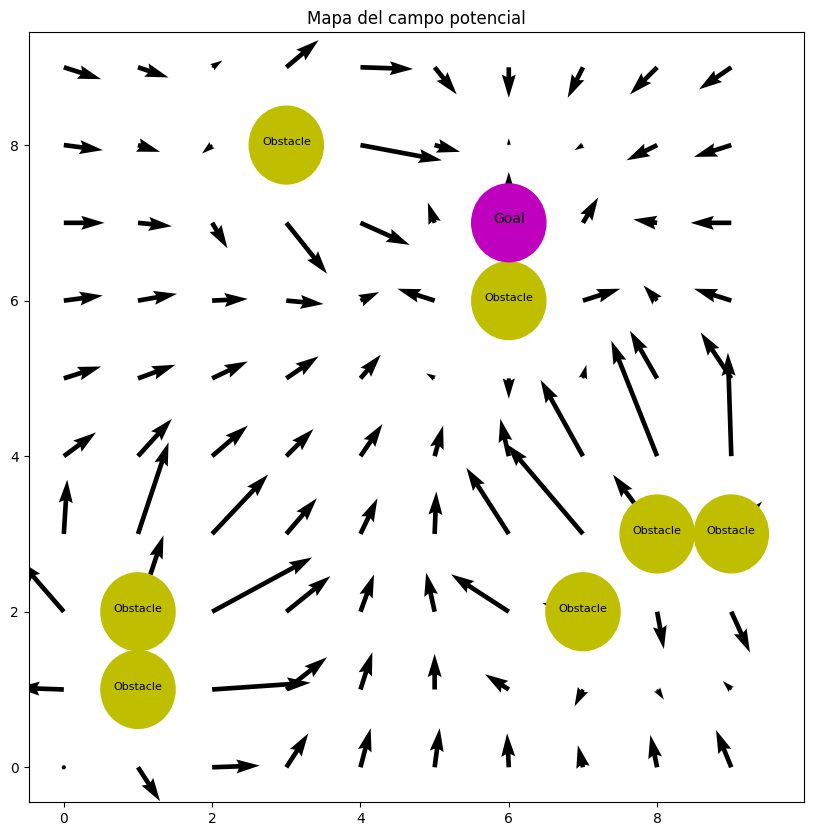

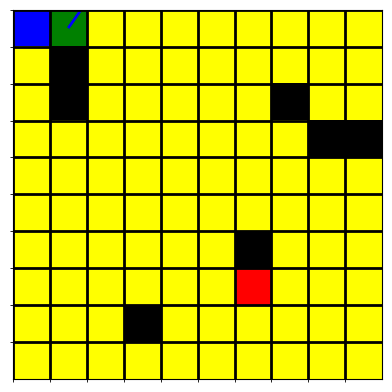


La velocidad es de 23.853720883753127 m/s

ATENCION! Obstáculo a 1.0 m, con una certeza de 0.35

ATENCION! Obstáculo a 2.0 m, con una certeza de 0.2



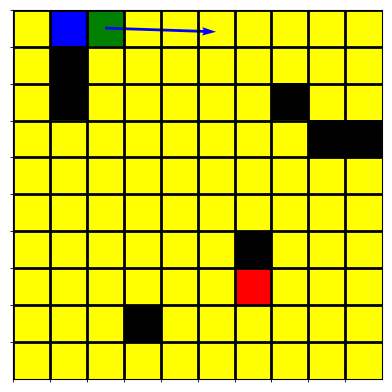


La velocidad es de 28.0178514522438 m/s
Presiona Enter para continuar con la siguiente iteración...



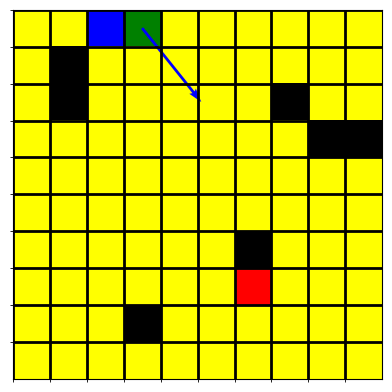


La velocidad es de 23.853720883753127 m/s
Presiona Enter para continuar con la siguiente iteración...



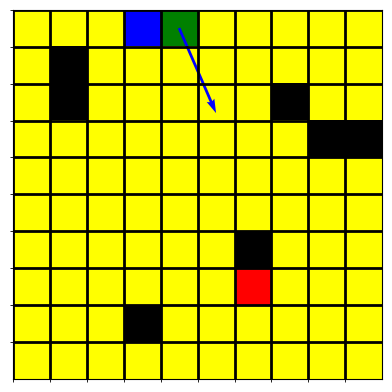


La velocidad es de 23.769728648009426 m/s
Presiona Enter para continuar con la siguiente iteración...



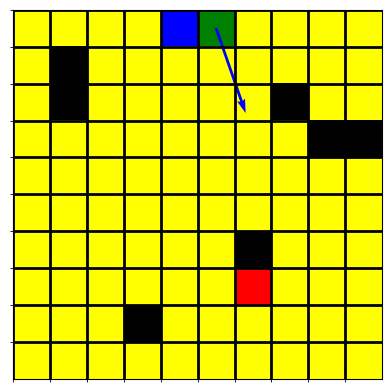


La velocidad es de 23.194827009486403 m/s
Presiona Enter para continuar con la siguiente iteración...

ATENCION! Obstáculo a 2.8284271247461903 m, con una certeza de 0.1



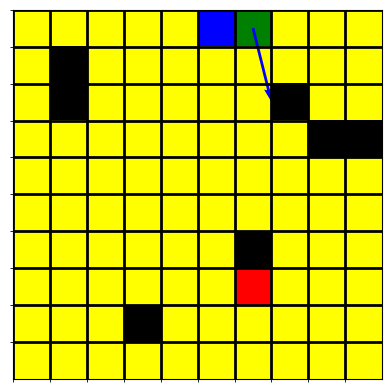


La velocidad es de 20.024984394500787 m/s
Presiona Enter para continuar con la siguiente iteración...

ATENCION! Obstáculo a 2.23606797749979 m, con una certeza de 0.2




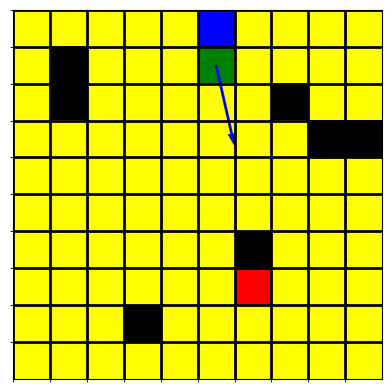


La velocidad es de 21.0 m/s
Presiona Enter para continuar con la siguiente iteración...

ATENCION! Obstáculo a 2.23606797749979 m, con una certeza de 0.2



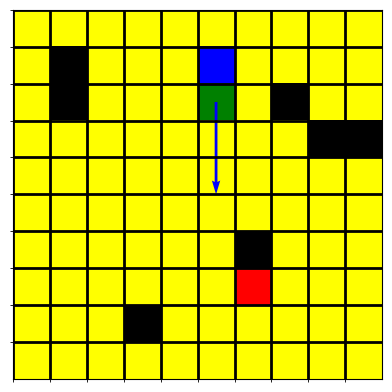


La velocidad es de 23.53720459187964 m/s
Presiona Enter para continuar con la siguiente iteración...

ATENCION! Obstáculo a 2.0 m, con una certeza de 0.2



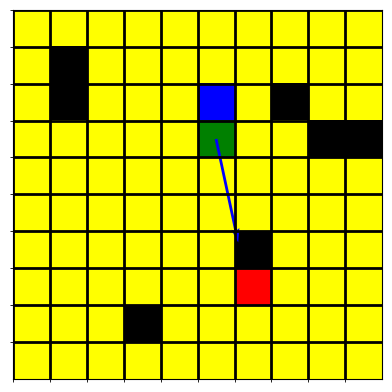


La velocidad es de 25.019992006393608 m/s
Presiona Enter para continuar con la siguiente iteración...



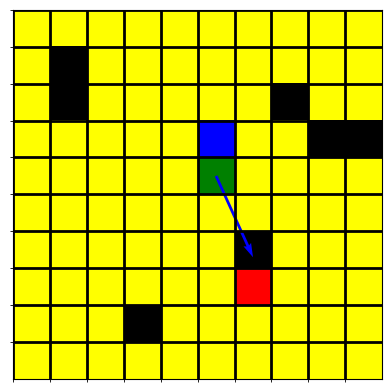


La velocidad es de 18.681541692269406 m/s
Presiona Enter para continuar con la siguiente iteración...

ATENCION! Obstáculo a 2.23606797749979 m, con una certeza de 0.2



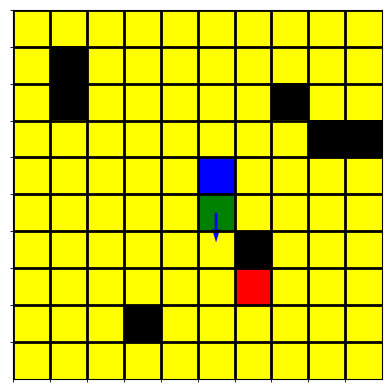


La velocidad es de 5.830951894845301 m/s
Presiona Enter para continuar con la siguiente iteración...

ATENCION! Obstáculo a 1.4142135623730951 m, con una certeza de 0.2



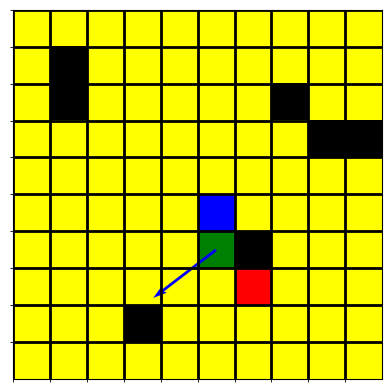


La velocidad es de 23.08679276123039 m/s
Presiona Enter para continuar con la siguiente iteración...

ATENCION! Obstáculo a 1.0 m, con una certeza de 0.35

ATENCION! Obstáculo a 2.8284271247461903 m, con una certeza de 0.1



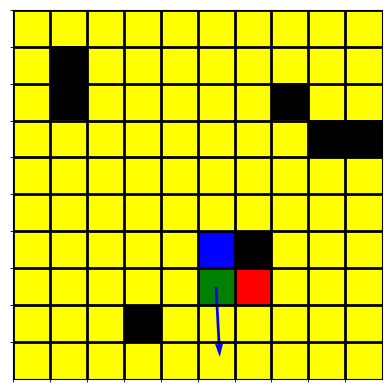


La velocidad es de 12.649110640673518 m/s
Presiona Enter para continuar con la siguiente iteración...

ATENCION! Obstáculo a 2.23606797749979 m, con una certeza de 0.2



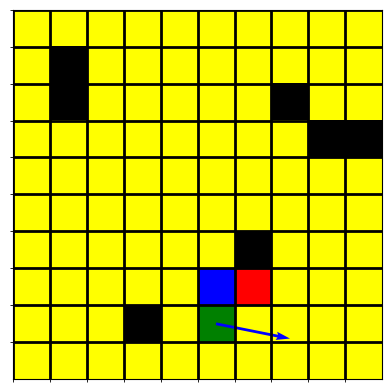


La velocidad es de 15.524174696260024 m/s
Presiona Enter para continuar con la siguiente iteración...

ATENCION! Obstáculo a 2.0 m, con una certeza de 0.2




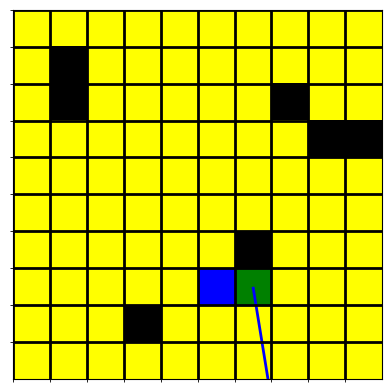


La velocidad es de 30.0 m/s

Se llegó al punto B con 14 pasos


In [ ]:
################################################################## PROGRAMA ##################################################################

x = np.arange(0,10,1)
y = np.arange(0,10,1)


# Punto B
goal = (6,7)

# Obstáculo

# Define la cantidad máxima de obstáculos.
max_tuplas = 7

# Crea una lista vacía para almacenar las posiciones.
obstacle = []

# Genera tuplas aleatorias y agrega a la lista
for _ in range(max_tuplas):
    o_x = random.randint(0, 9)
    o_y = random.randint(0, 9)

    tupla = (o_x, o_y)
    if tupla==goal:
        continue
    obstacle.append(tupla)

X, Y = np.meshgrid(x,y)

delx = np.zeros_like(X)
dely = np.zeros_like(Y)

"""
    Inside the nested loop, distance from each point to the goal and ostacle is
    calculated, Similarly angles are calculated. Then I simply used the formula give and
    superimposed it to the Goals potential field.Also
    α = 12
    β = 5
    s = 2
    r = 0.5
"""
s = 2
r=0.5
a=12
for i in range(len(x)):
      for j in range(len(y)):


            # finding the goal distance and obstacle distance
            d_goal = np.sqrt((goal[0]-X[i][j])**2 + ((goal[1]-Y[i][j]))**2)
            #d_obstacle = np.sqrt((obstacle[0]-X[i][j])**2 + (obstacle[1]-Y[i][j])**2)
            #print(f"{i} and {j}")

            #finding theta correspoding to the goal and obstacle
            theta_goal= np.arctan2(goal[1] - Y[i][j], goal[0]  - X[i][j])
            #theta_obstacle = np.arctan2(obstacle[1] - Y[i][j], obstacle[0]  - X[i][j])

            for m in range(len(obstacle)):
                delx, dely = add_obstacle(X, Y, delx, dely, obstacle[m], i, j)

            if d_goal < r:
                delx[i][j] += 0
                dely[i][j] += 0
            elif d_goal > r+s:
                if delx[i][j] != 0:
                    delx[i][j]  += (a * s *np.cos(theta_goal))
                else:
                    delx[i][j]  = (a * s *np.cos(theta_goal))
                if dely[i][j] != 0:
                    dely[i][j]  += (a * s *np.sin(theta_goal))
                else:
                    dely[i][j]  = (a * s *np.sin(theta_goal))
            else:
                if delx[i][j] != 0:
                    delx[i][j]  += (a * (d_goal-r) *np.cos(theta_goal))
                else:
                    delx[i][j]  = (a * (d_goal-r) *np.cos(theta_goal))
                if dely[i][j] != 0:
                    dely[i][j]  += (a * (d_goal-r) *np.sin(theta_goal))
                else:
                    dely[i][j]  = (a * (d_goal-r) *np.sin(theta_goal))

fig, ax = plt.subplots(figsize=(10,10))

#seek_points = np.array([[10,30]])
#ax.streamplot(X,Y,delx,dely, start_points=seek_points)

ax.quiver(X, Y, delx, dely)
for m in range(len(obstacle)):
    ax.add_patch(plt.Circle(obstacle[m], r, color='y'))
    ax.annotate("Obstacle", xy=obstacle[m], fontsize=8, ha="center")

ax.add_patch(plt.Circle((6, 7), r, color='m'))

ax.annotate("Goal", xy=(6,7), fontsize=10, ha="center")

ax.set_title('Mapa del campo potencial')


plt.show()

# Create a 10x10 matrix filled with zeros
map_size = (10, 10)
map_array = np.zeros(map_size, dtype=int)

# Generate random indices for placing 1s
#indices = np.random.choice(map_size[0] * map_size[1], size=20, replace=False)

# Fill the randomly selected indices with 1s
#map_array.flat[indices] = 1
for m in range(len(obstacle)):
    map_array[obstacle[m][1]][obstacle[m][0]]=1

#map_array[obstacle[1]][obstacle[0]]=1
map_array[goal[1]][goal[0]]=2

certezas = (10, 10)
certezas = np.zeros(certezas)


# Punto B
#goal = [1,7]
punto_b=goal
# Obstáculo
#obstacle = [6,3]

# Robot
frente=[1,0]
cola=[0,0]
map_array[frente[1]][frente[0]]=3
map_array[cola[1]][cola[0]]=4

#print(map_array)
#mostrar_mapa(map_array)
vel=hallar_velocidad(frente,delx,dely)
mostrar_mapa(map_array,delx,dely,frente)
print("\nLa velocidad es de {} m/s".format(vel))

f_x = frente[0]
f_y = frente[1]

c_x = cola[0]
c_y = cola[1]

frente_ant=frente

for i in range(15000):
    adelante=0
    giro=0

    f_x = frente[0]
    f_y = frente[1]

    c_x = cola[0]
    c_y = cola[1]

    # Se ve la orientación
    if f_x == c_x:
        pos="vertical"
    elif f_y == c_y:
        pos="horizontal"
    else:
        print("Orientación del robot no válida")
        break

    # Se determina la posible siguiente posición
    if delx[f_y][f_x] > 0 and dely[f_y][f_x] > 0:
        ps_x=f_x+1
        ps_y=f_y+1
    elif delx[f_y][f_x] < 0 and dely[f_y][f_x] < 0:
        ps_x=f_x-1
        ps_y=f_y-1
    elif delx[f_y][f_x] < 0 and dely[f_y][f_x] > 0:
        ps_x=f_x-1
        ps_y=f_y+1
    elif delx[f_y][f_x] > 0 and dely[f_y][f_x] < 0:
        ps_x=f_x+1
        ps_y=f_y-1
    elif delx[f_y][f_x] > 0 and dely[f_y][f_x] == 0:
        ps_x=f_x+1
        ps_y=f_y
    elif delx[f_y][f_x] < 0 and dely[f_y][f_x] == 0:
        ps_x=f_x-1
        ps_y=f_y
    elif delx[f_y][f_x] == 0 and dely[f_y][f_x] > 0:
        ps_x=f_x
        ps_y=f_y+1
    elif delx[f_y][f_x] == 0 and dely[f_y][f_x] < 0:
        ps_x=f_x
        ps_y=f_y-1
    else:
        ps_x=f_x
        ps_y=f_y


    punto_sgte=[ps_x,ps_y]
    #habilitado=1

    # Se verifica si la siguiente posición es válida
    if pos=="horizontal":
        if punto_sgte[0] > c_x or punto_sgte[0] < c_x:
            if punto_sgte[1] > f_y or punto_sgte[1] < f_y or punto_sgte[0] > f_x or punto_sgte[0] < f_x:
                adelante=1
        else:
            giro=1

        # Apunta a la derecha
        if f_x > c_x:
            orientacion="derecha"
        # Apunta a la izquierda
        else:
            orientacion="izquierda"

    if pos=="vertical":
        if punto_sgte[1] > c_y or punto_sgte[1] < c_y:
            if punto_sgte[0] > f_x or punto_sgte[0] < f_x or punto_sgte[1] > f_y or punto_sgte[1] < f_y:
                adelante=1
        else:
            giro=1

        # Apunta abajo
        if f_y > c_y:
            orientacion="abajo"
        # Apunta arriba
        else:
            orientacion="arriba"


    if punto_sgte[0] == f_x and punto_sgte[1] == f_y and punto_sgte[0] != punto_b[0] and punto_sgte[1] != punto_b[1]:
        adelante=0
        giro=0

    if adelante or giro:
        if adelante and giro!=1:
            band=0
            obs=buscar_obstaculos(map_array, frente, orientacion)
            if len(obs) > 0:
                    for j in range(len(obs)):
                        d,c = calcular_certeza(obs[j],(frente[0],frente[1]))
                        print("\nATENCION! Obstáculo a {} m, con una certeza de {}".format(d,c))
            punto_aux, band, info, mov = mover_adelante(frente, cola, punto_sgte, map_array, pos, certezas, band)
            if frente_ant == punto_aux:
                print("\nMínimo local. Se realizaron {} pasos".format(i))
                break
            if band==1:
                print(info)
                print("Se realizaron {} pasos".format(i))
                break
            else:
                print(info)
                map_array[f_y][f_x]=0
                map_array[c_y][c_x]=0
                frente_ant=frente
                if mov=="adelante":
                    cola=frente
                    frente=punto_aux
                    map_array[frente[1]][frente[0]]=3
                    map_array[cola[1]][cola[0]]=4
                    #print(map_array)
                    #mostrar_mapa(map_array)
                    vel=hallar_velocidad(punto_aux,delx,dely)
                    mostrar_mapa(map_array,delx,dely,punto_aux)
                    print("\nLa velocidad es de {} m/s".format(vel))
                else:
                    frente=punto_aux
                    map_array[frente[1]][frente[0]]=3
                    map_array[cola[1]][cola[0]]=4
                    #print(map_array)
                    #mostrar_mapa(map_array)
                    vel=hallar_velocidad(punto_aux,delx,dely)
                    mostrar_mapa(map_array,delx,dely,punto_aux)
                    print("\nLa velocidad es de {} m/s".format(vel))
        else:
            band=0
            obs=buscar_obstaculos(map_array, frente, orientacion)
            if len(obs) > 0:
                for j in range(len(obs)):
                    d,c = calcular_certeza(obs[j],(frente[0],frente[1]))
                    print("\nATENCION! Obstáculo a {} m, con una certeza de {}\n".format(d,c))
            punto_aux, band, info, mov = girar(frente, cola, punto_sgte, map_array, pos, certezas, band)
            if frente_ant == punto_aux:
                print("\nMínimo local. Se realizaron {} pasos".format(i))
                break
            if band==1:
                print(info)
                print("Se realizaron {} pasos".format(i))
                break
            else:
                print(info)
                map_array[f_y][f_x]=0
                map_array[c_y][c_x]=0
                frente_ant=frente
                if mov=="adelante":
                    cola=frente
                    frente=punto_aux
                    map_array[frente[1]][frente[0]]=3
                    map_array[cola[1]][cola[0]]=4
                    #print(map_array)
                    vel=hallar_velocidad(punto_aux,delx,dely)
                    mostrar_mapa(map_array,delx,dely,punto_aux)
                    print("\nLa velocidad es de {} m/s".format(vel))
                else:
                    frente=punto_aux
                    map_array[frente[1]][frente[0]]=3
                    map_array[cola[1]][cola[0]]=4
                    #print(map_array)
                    #mostrar_mapa(map_array)
                    vel=hallar_velocidad(punto_aux,delx,dely)
                    mostrar_mapa(map_array,delx,dely,punto_aux)
                    print("\nLa velocidad es de {} m/s".format(vel))

        #punto_ant = punto_aux
        if punto_aux[0]==punto_b[0] and punto_aux[1]==punto_b[1]:
            print("\nSe llegó al punto B con {} pasos".format(i+1))
            break
        input("Presiona Enter para continuar con la siguiente iteración...")
    else:
        print("\nMínimo local. Se realizaron {} pasos".format(i))
        break
